In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [19]:
df = pd.read_csv('data.csv')

In [20]:
# Dropping unnecessary columns
df.drop(['searchInv', 'testDrive', 'findDealer'],axis=1,inplace=True)

In [21]:
df.head()

,bpFinish,vehQuote,bpStart,tradeIn,incView,quickQuote,paymentEst,clickCall,avgPageVis,avgSiteTime,naturalSearchVis,bookmarkedVis,paidSearchVis,bannerVis,vehHomeVis,galleryVis
0,7866,107,14352,14,5021,13,8067,3,3.997789,377.434487,11736,13865,8846,29029,9630,1236
1,7800,116,14679,34,4975,32,8159,28,3.909444,371.873767,12572,16079,9200,31176,10059,1296
2,7701,112,14652,17,4603,34,7470,30,3.952293,373.958955,10040,13643,11368,27494,12213,1485
3,7086,82,13443,22,3865,27,6772,7,3.973709,381.409387,9452,10967,11084,28035,11015,1365
4,7570,92,14032,15,3980,27,7324,16,4.088452,390.358692,10893,12097,11356,26167,10542,1463


In [22]:
df.shape

(730, 16)

In [23]:
df.columns

Index(['bpFinish', 'vehQuote', 'bpStart', 'tradeIn', 'incView', 'quickQuote',
       'paymentEst', 'clickCall', 'avgPageVis', 'avgSiteTime',
       'naturalSearchVis', 'bookmarkedVis', 'paidSearchVis', 'bannerVis',
       'vehHomeVis', 'galleryVis'],
      dtype='object')

In [25]:
features = ['bpFinish', 'vehQuote', 'bpStart', 'tradeIn', 'incView', 'quickQuote',
       'paymentEst', 'clickCall', 'avgPageVis', 'avgSiteTime',
       'naturalSearchVis', 'bookmarkedVis', 'paidSearchVis', 'bannerVis',
       'vehHomeVis', 'galleryVis']
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [28]:
pd.DataFrame(data = x, columns = features).head()

,bpFinish,vehQuote,bpStart,tradeIn,incView,quickQuote,paymentEst,clickCall,avgPageVis,avgSiteTime,naturalSearchVis,bookmarkedVis,paidSearchVis,bannerVis,vehHomeVis,galleryVis
0,-1.682885,-0.164132,-1.036097,-0.936442,1.460688,-1.398409,-0.701713,-1.375684,-1.063968,-2.080612,-1.352059,-0.860570,-0.444130,0.704557,-0.680488,-0.002512
1,-1.696556,-0.010958,-0.961673,1.479114,1.426831,-1.126143,-0.674688,1.106396,-1.168408,-2.275856,-1.137820,-0.245212,-0.309990,0.907756,-0.576703,0.144570
2,-1.717064,-0.079035,-0.967818,-0.574108,1.153030,-1.097484,-0.877079,1.304962,-1.117752,-2.202642,-1.786688,-0.922272,0.511524,0.559279,-0.055603,0.607877
3,-1.844462,-0.589615,-1.242983,0.029781,0.609844,-1.197792,-1.082113,-0.978551,-1.092435,-1.941049,-1.937373,-1.666038,0.403909,0.610481,-0.345426,0.313713
4,-1.744201,-0.419422,-1.108928,-0.815664,0.694487,-1.197792,-0.919966,-0.085003,-0.956789,-1.626828,-1.568092,-1.351966,0.506977,0.433688,-0.459855,0.553947


In [59]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)

In [60]:
pca.explained_variance_ratio_

array([0.27048364, 0.18970762, 0.10676635, 0.07970867, 0.0711545 ,
       0.05388503, 0.04535995, 0.04111207])

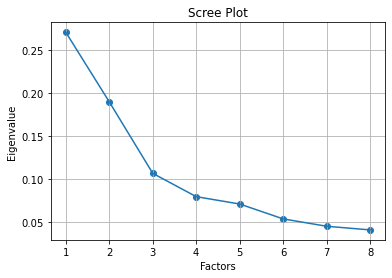

In [61]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,9),importance)
plt.plot(range(1,9),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [130]:
pca = PCA(n_components=4)

In [131]:
principalComponents = pca.fit_transform(x)

In [132]:
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf = principalDf
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4
0,0.142653,-3.968361,-0.611057,-0.098710
1,0.453032,-2.914421,1.059545,2.281821
2,0.504539,-3.810838,0.189021,1.937930
3,-0.173433,-4.306159,-0.519000,0.653448
4,0.013534,-3.924415,-0.465935,0.683394


In [133]:
pca.explained_variance_ratio_

array([0.27048364, 0.18970762, 0.10676635, 0.07970867])

In [134]:
pca.explained_variance_

array([4.33367485, 3.03948561, 1.71060488, 1.27708818])

In [135]:
pca.components_

array([[ 0.11310315, -0.02811804,  0.2157    , -0.00314629,  0.34618444,
        -0.25387134,  0.18986294, -0.03148894, -0.34112482, -0.01169661,
         0.14225099,  0.30602527,  0.34347456,  0.34472003,  0.35693978,
         0.35205738],
       [ 0.4538396 ,  0.01287668,  0.34991107,  0.2050968 , -0.1030949 ,
         0.34059869,  0.33729825,  0.144692  ,  0.19466801,  0.31347539,
         0.37357282,  0.20414242, -0.11784576, -0.08750461,  0.05325753,
        -0.16200358],
       [-0.07919344,  0.54683722, -0.30047682,  0.39116474,  0.1375237 ,
         0.07824899, -0.30202095,  0.17529827,  0.2778825 , -0.14219347,
         0.27210974,  0.19765983,  0.0029833 , -0.06020699,  0.11696556,
         0.27668388],
       [-0.19099285, -0.24343732,  0.01716612,  0.27019163, -0.02509947,
         0.28884664,  0.14299556,  0.63089905, -0.15098182, -0.44040204,
        -0.18015312,  0.05185778,  0.14444067,  0.09078766,  0.08316822,
        -0.20125061]])

In [136]:
(np.dot(x[0],pca.components_[0]), np.dot(x[0],pca.components_[1]))

(0.14265282269754342, -3.968359019340448)

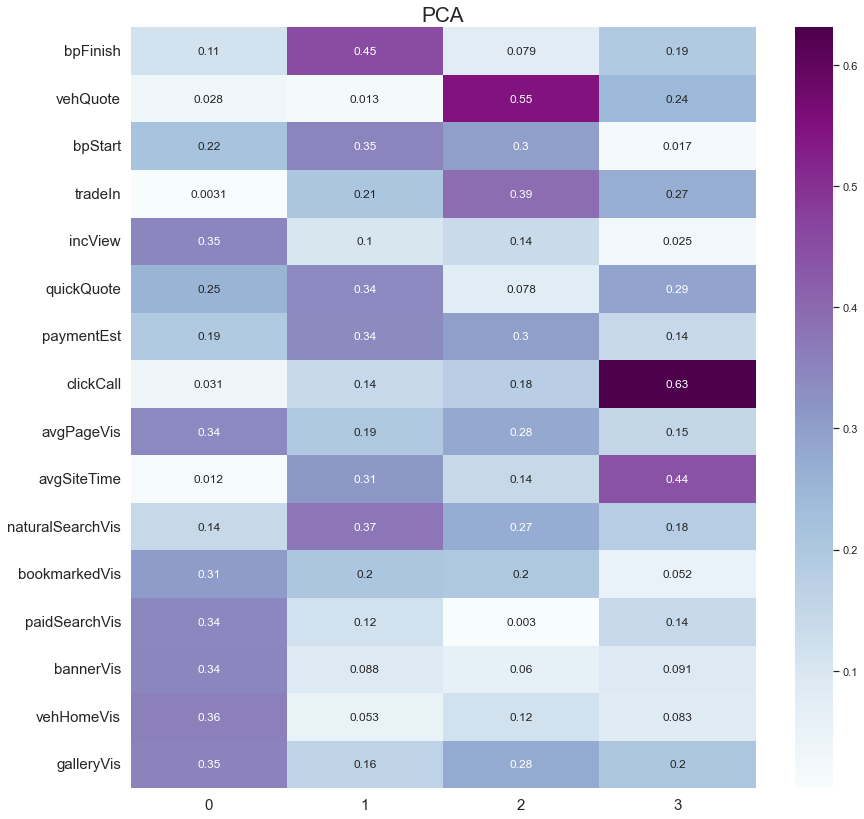

In [141]:
import seaborn as sns

df_cm = pd.DataFrame(np.abs(pca.components_), columns=df.columns)
plt.figure(figsize = (14,14))
ax = sns.heatmap(df_cm.T, annot=True, cmap="BuPu")
sns.set(rc={'figure.facecolor':'white'})

ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
plt.title('PCA', fontsize='xx-large')


plt.savefig('PCA.png', dpi=200)